# Análise exploratória de dados e Sistema de Recomendação para o dataset MovieLens

O dataset MovieLens  é  composto por 100004 _ratings_ e 1296 _tags_ aplicadas a 9125 filmes, distribuidos em 671 usuários. Este dataset é largamente utilizado na construção e validação de sistemas de recomendação. Neste projeto uma ánalise exploratória dos dados contidos nesse dataset será realizada de modo a responder as seguintes perguntas:

* Existe alguma relação entre a avaliação e o gênero cinematográfico?
* Quais gêneros possuem maior correlação entre si

A seguir, um sistema de recomendação será construído de maneira a confirmar as conclusões das questões acima.


## 1. Análise exploratória de dados

Inicialmente, iremos exportar as bibliotecas necessárias para realizar a análise exploratória de dados, utilizando a convenção comumente utilizada pela comunidade Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


A seguir, iremos carregar os dataframes contendo os títulos dos filmes ('movies.csv'), das avaliações ('ratings.csv')

In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

Com os datasets carregados, iremos para a etapa de pré-processamento dos dataframes, iniciando com o dataset, que contém os títulos dos filmes, e os gêneros.

In [3]:
movies_df.tail()

movieId                                              title  \
9120   162672                                Mohenjo Daro (2016)   
9121   163056                               Shin Godzilla (2016)   
9122   163949  The Beatles: Eight Days a Week - The Touring Y...   
9123   164977                           The Gay Desperado (1936)   
9124   164979                              Women of '69, Unboxed   

                               genres  
9120          Adventure|Drama|Romance  
9121  Action|Adventure|Fantasy|Sci-Fi  
9122                      Documentary  
9123                           Comedy  
9124                      Documentary

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


O dataframe 'movies_df' não possui valores faltantes. 

Precisa-se analisar separadamente os gêneros cinematográficos. Deste modo, foi um criado um novo dataframe contendo um único gênero por linha usando o método split para separar a string contendo os gêneros da coluna 'genres'e dimininui-se em 1 a indexação do dataframe, para termos uma única coluna. Assim obtemos a coluna 'genres' contendo um gênero por linha.

In [5]:
split_genres = pd.DataFrame(movies_df['genres'].str.split('|', expand = True).stack()) #cria o dataframe com um gênero em cada linha, com o separador '|'
split_genres.index = split_genres.index.droplevel(-1) #diminui o índice em 1
split_genres.columns = ['genres'] # atribui o nome 'genres' a coluna
split_genres.head() # imprime as 5 primeiras linhas do dataframe

genres
0  Adventure
0  Animation
0   Children
0     Comedy
0    Fantasy

Substituí-se a coluna 'genre' do dataset original pela coluna 'split_genres', gerada acima em duas etapas. Cria-se o dataframe 'movies_no_genre' deletando a coluna 'genres' original e, logo após a coluna 'split_genres' é inserida. 

In [6]:
movies_no_genre = movies_df.drop('genres', axis = 1)
movies_df_split = movies_no_genre.join(split_genres).reset_index(drop=True)
movies_df_split.head()

movieId             title     genres
0        1  Toy Story (1995)  Adventure
1        1  Toy Story (1995)  Animation
2        1  Toy Story (1995)   Children
3        1  Toy Story (1995)     Comedy
4        1  Toy Story (1995)    Fantasy

In [7]:
ratings_df.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Nõ há valores faltantes.

A coluna 'timestamp' não será utilizada nessa análise, logo remove-se:

In [9]:
ratings_df = ratings_df.drop('timestamp', axis=1)

In [10]:
ratings_df.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

Combinam-se os dataframes ratings_df e movies_df com o método merge

In [11]:
movieratings = ratings_df.merge(movies_df_split)

In [12]:
movieratings.head(10)

userId  movieId  rating                   title genres
0       1       31     2.5  Dangerous Minds (1995)  Drama
1       7       31     3.0  Dangerous Minds (1995)  Drama
2      31       31     4.0  Dangerous Minds (1995)  Drama
3      32       31     4.0  Dangerous Minds (1995)  Drama
4      36       31     3.0  Dangerous Minds (1995)  Drama
5      39       31     3.0  Dangerous Minds (1995)  Drama
6      73       31     3.5  Dangerous Minds (1995)  Drama
7      88       31     3.0  Dangerous Minds (1995)  Drama
8      96       31     2.5  Dangerous Minds (1995)  Drama
9     110       31     4.0  Dangerous Minds (1995)  Drama

A seguir, obtem-se a avaliação média de cada gênero usando o método groupby no índice 'genres'. O dataframe 'mean_ratings' com a ordem crescente das avaliações médias por gênero é mostrada abaixo.

In [13]:
mean_ratings = movieratings.groupby(['genres'], as_index=False)['rating'].aggregate(np.mean).sort_values(by=['rating'] ,ascending=True)


In [14]:
mean_ratings

genres    rating
11              Horror  3.315243
1               Action  3.445613
5               Comedy  3.446037
16              Sci-Fi  3.460430
4             Children  3.466187
9              Fantasy  3.518063
17            Thriller  3.518502
2            Adventure  3.520393
15             Romance  3.556165
19             Western  3.566423
12                IMAX  3.571134
13             Musical  3.598793
3            Animation  3.636062
14             Mystery  3.679541
6                Crime  3.679639
8                Drama  3.681780
0   (no genres listed)  3.777778
7          Documentary  3.813299
18                 War  3.817214
10           Film-Noir  3.955702

Para obtermos a média de avaliações por gênero e por usuário, agrupamos a identificação do usuários e dos gêneros.

In [15]:
mean_ratings_per_user = movieratings.groupby(['userId', 'genres'], as_index=False)['rating'].aggregate(np.mean)
mean_ratings_per_user.head()

userId     genres    rating
0       1     Action  2.800000
1       1  Adventure  2.166667
2       1  Animation  2.000000
3       1   Children  2.500000
4       1     Comedy  2.000000

Separam-se as avaliações da coluna 'genres' criando a tabela dinâmica mean_ratings_per_genre. Os gêneros que não foram avaliados recebem nota 0 e a coluna com a média dos filmes não classificados ('no genres listed') foi excluída.

In [16]:
mean_ratings_per_genre = mean_ratings_per_user.pivot_table(index='userId', columns='genres', values='rating')
mean_ratings_per_genre = mean_ratings_per_genre.fillna(0)
mean_ratings_per_genre = mean_ratings_per_genre.drop('(no genres listed)', axis = 1)
mean_ratings_per_genre.head()

genres    Action  Adventure  Animation  Children    Comedy     Crime  \
userId                                                                 
1       2.800000   2.166667   2.000000  2.500000  2.000000  2.500000   
2       3.315789   3.750000   3.666667  3.500000  3.093750  3.666667   
3       3.468750   3.300000   2.875000  2.700000  3.611111  3.700000   
4       4.274194   4.338710   4.708333  4.634146  4.329545  4.157895   
5       4.000000   3.825000   3.900000  3.892857  3.981818  3.450000   

genres  Documentary     Drama   Fantasy  Film-Noir    Horror   IMAX   Musical  \
userId                                                                          
1          0.000000  2.571429  2.125000        0.0  3.000000  0.000  3.000000   
2          0.000000  3.615385  3.400000        0.0  3.500000  4.000  3.750000   
3          3.666667  3.920000  3.000000        0.0  3.375000  2.875  2.500000   
4          4.000000  4.464286  4.567568        5.0  3.944444  5.000  4.833333   
5          3.666667  3.807692  3.750000        0.0  3.875000  4.000  4.250000   

genres   Mystery   Romance    Sci-Fi  Thriller       War  Western  
userId                                                             
1       0.000000  3.500000  2.400000  2.833333  2.000000      3.0  
2       4.000000  3.590909  3.800000  3.333333  3.800000      5.0  
3       3.750000  3.650000  3.142857  3.545455  4.166667      4.0  
4       4.090909  4.500000  4.255814  4.022727  4.750000      3.0  
5       3.333333  4.081081  4.000000  3.625000  4.000000      0.0

As distribuições das avaliações para cada gênero são plotadas (18 gráficos) usando uma repetição aninhada.

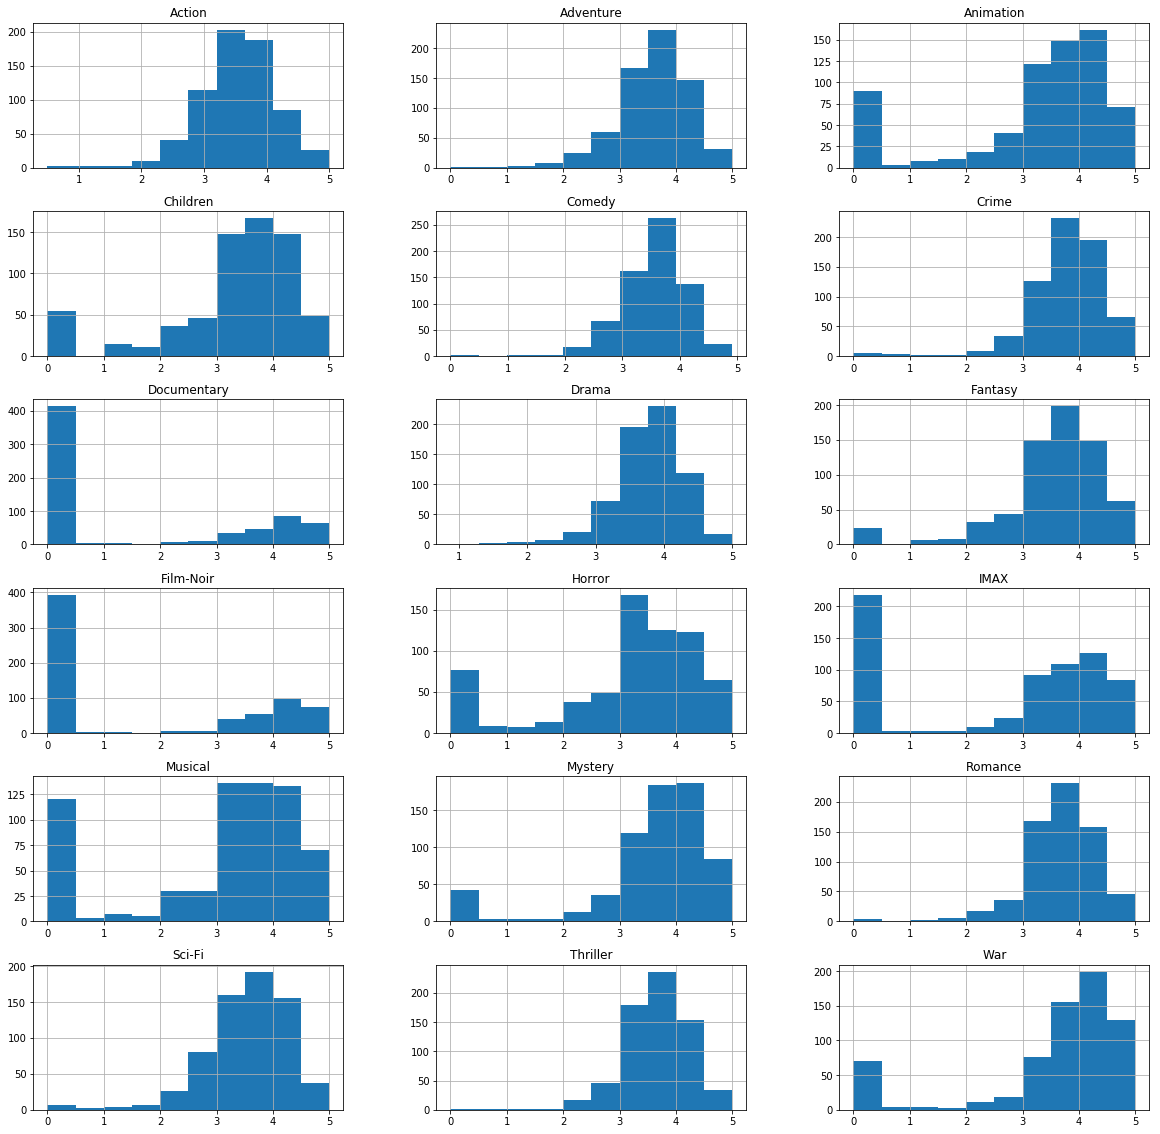

In [17]:
fig, axes = plt.subplots(len(mean_ratings_per_genre.columns)//3, 3, figsize=(20, 20))
i = 0
for triaxis in axes:
    for axis in triaxis:
        mean_ratings_per_genre.hist(column = mean_ratings_per_genre.columns[i], bins = 10, ax=axis)
        i = i+1

Quer-se saber quais são os gêneros que possuem maior relação entre si. Para identificar quais são, usa-se a correlação de Pearson, dada por:

$$ r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $$

Os índices de correlação de Pearson para os gêneros são obtidos aplicando-se os método corr() no dataframe

In [18]:
correlation_per_genre = mean_ratings_per_genre.corr()
correlation_per_genre

genres         Action  Adventure  Animation  Children    Comedy     Crime  \
genres                                                                      
Action       1.000000   0.769630   0.254205  0.268196  0.602091  0.501197   
Adventure    0.769630   1.000000   0.319664  0.347388  0.624174  0.402853   
Animation    0.254205   0.319664   1.000000  0.758140  0.286066  0.106506   
Children     0.268196   0.347388   0.758140  1.000000  0.314319  0.109301   
Comedy       0.602091   0.624174   0.286066  0.314319  1.000000  0.469921   
Crime        0.501197   0.402853   0.106506  0.109301  0.469921  1.000000   
Documentary  0.020232   0.025924   0.102723  0.083526  0.118497  0.102452   
Drama        0.609323   0.642132   0.276514  0.279913  0.654626  0.630129   
Fantasy      0.366463   0.502624   0.423161  0.461254  0.444395  0.307557   
Film-Noir    0.046723   0.083720   0.054205  0.080450  0.135674  0.150228   
Horror       0.243229   0.166531   0.193178  0.132126  0.210183  0.244706   
IMAX         0.243031   0.259088   0.408714  0.298347  0.152368  0.123047   
Musical      0.068926   0.203873   0.401620  0.392690  0.229541  0.031154   
Mystery      0.359956   0.330840   0.133510  0.120947  0.290341  0.398469   
Romance      0.470393   0.519073   0.273616  0.294005  0.642199  0.366265   
Sci-Fi       0.694208   0.671720   0.226535  0.255535  0.458582  0.338249   
Thriller     0.711124   0.578357   0.187563  0.195472  0.542128  0.598289   
War          0.280006   0.288077   0.235808  0.273427  0.325419  0.192354   
Western      0.108779   0.108975   0.195588  0.122302  0.141214  0.023255   

genres       Documentary     Drama   Fantasy  Film-Noir    Horror      IMAX  \
genres                                                                        
Action          0.020232  0.609323  0.366463   0.046723  0.243229  0.243031   
Adventure       0.025924  0.642132  0.502624   0.083720  0.166531  0.259088   
Animation       0.102723  0.276514  0.423161   0.054205  0.193178  0.408714   
Children        0.083526  0.279913  0.461254   0.080450  0.132126  0.298347   
Comedy          0.118497  0.654626  0.444395   0.135674  0.210183  0.152368   
Crime           0.102452  0.630129  0.307557   0.150228  0.244706  0.123047   
Documentary     1.000000  0.081503  0.128395   0.389923  0.070077  0.189919   
Drama           0.081503  1.000000  0.439193   0.108907  0.215792  0.190071   
Fantasy         0.128395  0.439193  1.000000   0.154093  0.101631  0.234755   
Film-Noir       0.389923  0.108907  0.154093   1.000000  0.183102  0.063674   
Horror          0.070077  0.215792  0.101631   0.183102  1.000000  0.133786   
IMAX            0.189919  0.190071  0.234755   0.063674  0.133786  1.000000   
Musical         0.174817  0.180462  0.290247   0.160577  0.135255  0.184563   
Mystery         0.139930  0.403645  0.272009   0.233965  0.216319  0.102481   
Romance         0.090647  0.642545  0.388404   0.100243  0.168178  0.092641   
Sci-Fi          0.004324  0.459924  0.366061   0.030712  0.201318  0.215784   
Thriller        0.071956  0.664740  0.344198   0.123081  0.316046  0.199535   
War             0.159686  0.414580  0.261720   0.218671  0.205324  0.233545   
Western         0.255605  0.107276  0.076460   0.270578  0.194022  0.314670   

genres        Musical   Mystery   Romance    Sci-Fi  Thriller       War  \
genres                                                                    
Action       0.068926  0.359956  0.470393  0.694208  0.711124  0.280006   
Adventure    0.203873  0.330840  0.519073  0.671720  0.578357  0.288077   
Animation    0.401620  0.133510  0.273616  0.226535  0.187563  0.235808   
Children     0.392690  0.120947  0.294005  0.255535  0.195472  0.273427   
Comedy       0.229541  0.290341  0.642199  0.458582  0.542128  0.325419   
Crime        0.031154  0.398469  0.366265  0.338249  0.598289  0.192354   
Documentary  0.174817  0.139930  0.090647  0.004324  0.071956  0.159686   
Drama        0.180462  0.403645  0.642545  0.45

Mostrando apenas os índices maiores que 0.7 e completando os valores faltantes com zeros, temos:

In [19]:
correlation_per_genre[correlation_per_genre > 0.7].fillna(0)

genres         Action  Adventure  Animation  Children  Comedy  Crime  \
genres                                                                 
Action       1.000000    0.76963    0.00000   0.00000     0.0    0.0   
Adventure    0.769630    1.00000    0.00000   0.00000     0.0    0.0   
Animation    0.000000    0.00000    1.00000   0.75814     0.0    0.0   
Children     0.000000    0.00000    0.75814   1.00000     0.0    0.0   
Comedy       0.000000    0.00000    0.00000   0.00000     1.0    0.0   
Crime        0.000000    0.00000    0.00000   0.00000     0.0    1.0   
Documentary  0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Drama        0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Fantasy      0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Film-Noir    0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Horror       0.000000    0.00000    0.00000   0.00000     0.0    0.0   
IMAX         0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Musical      0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Mystery      0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Romance      0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Sci-Fi       0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Thriller     0.711124    0.00000    0.00000   0.00000     0.0    0.0   
War          0.000000    0.00000    0.00000   0.00000     0.0    0.0   
Western      0.000000    0.00000    0.00000   0.00000     0.0    0.0   

genres       Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  \
genres                                                                       
Action               0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Adventure            0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Animation            0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Children             0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Comedy               0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Crime                0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Documentary          1.0    0.0      0.0        0.0     0.0   0.0      0.0   
Drama                0.0    1.0      0.0        0.0     0.0   0.0      0.0   
Fantasy              0.0    0.0      1.0        0.0     0.0   0.0      0.0   
Film-Noir            0.0    0.0      0.0        1.0     0.0   0.0      0.0   
Horror               0.0    0.0      0.0        0.0     1.0   0.0      0.0   
IMAX                 0.0    0.0      0.0        0.0     0.0   1.0      0.0   
Musical              0.0    0.0      0.0        0.0     0.0   0.0      1.0   
Mystery              0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Romance              0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Sci-Fi               0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Thriller             0.0    0.0      0.0        0.0     0.0   0.0      0.0   
War                  0.0    0.0      0.0        0.0     0.0   0.0      0.0   
Western              0.0    0.0      0.0        0.0     0.0   0.0      0.0   

genres       Mystery  Romance  Sci-Fi  Thriller  War  Western  
genres                                                         
Action           0.0      0.0     0.0  0.711124  0.0      0.0  
Adventure        0.0      0.0     0.0  0.000000  0.0      0.0  
Animation        0.0      0.0     0.0  0.000000  0.0      0.0  
Children         0.0      0.0     0.0  0.000000  0.0      0.0  
Comedy           0.0      0.0     0.0  0.000000  0.0      0.0  
Crime            0.0      0.0     0.0  0.000000  0.0      0.0  
Documentary      0.0      0.0     0.0  0.000000  0.0      0.0  
Drama            0.0      0.0     0.0  0.000000  0.0      0.0  
Fantasy          0.0      0.0     0.0  0.000000  0.0      0.0  
Film-Noir        0.0      0.0     0.0  0.000000  0.0      0.0  
Horror           0.0      0.0     0.0  0.000000  0.0      0.0  
IMAX            

Graficamente, o heatmap da biblioteca seaborn mostra a correlação ente os gêneros

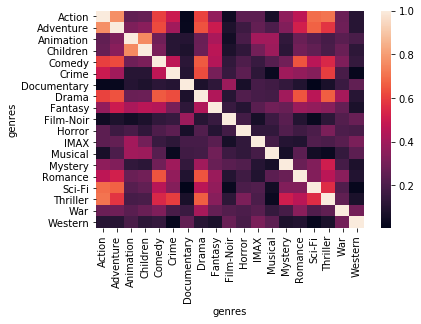

In [20]:
sns.heatmap(correlation_per_genre, 
        xticklabels=correlation_per_genre.columns,
        yticklabels=correlation_per_genre.columns)


## 1.1 Conclusão Análise Exploratória de Dados

* De fato, existe uma relação entre o gênero e a cinematográfico e a média das avaliações. Filmes Noir, Filmes de Guerra e Documentários tendem a receber avaliações mais positivas, embora sejam gêneros pouco consumidos pelos usuários dessa população. Ao passo que filmes classificados como Terror, Ação e Comédia recebem em média, menos avaliações positivas (4 e 5 estrelas).

* Os pares de gêneros com maior correlação nesse dataset são Ação e Aventura, Ação e Suspense e Animação e Infantil. E, de fato, são gêneros cinnematográficos similares. Todos esses pares mostraram índices de correlação maiores que 0,7

---

# 2. Sistema de recomendação 

A partir do dataframe ratings_df geramos uma tabela dinâmica contendo as identificações dos usuários como índices e as identificações dos filmes como colunas, preenchendo com zero os valores faltantes.

In [21]:
ratings_df.head()

userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0

In [22]:
ratings_userId_movieId = ratings_df.pivot_table(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
ratings_userId_movieId.head()

userId   1    2    3    4    5    6    7    8    9    10  ...   662  663  664  \
movieId                                                   ...                   
1        0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  4.0  0.0 ...   0.0  4.0  3.5   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3        0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

userId   665  666  667  668  669  670  671  
movieId                                     
1        0.0  0.0  0.0  0.0  0.0  4.0  5.0  
2        3.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        3.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 671 columns]

Usa-se o método MinMaxScaler para que a matriz com as features de interesse estejam no intervalo entre 0 e 1. 

$$ x_(newfeature) = \frac{x - x_(min)}{x_(max)}$$

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
ratings_norm = min_max_scaler.fit_transform(ratings_userId_movieId)
ratings_norm_df = pd.DataFrame(ratings_norm)

In [24]:
ratings_norm

array([[0. , 0. , 0. , ..., 0. , 0.8, 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

As similaridades entre os filmes e entre os usuários é calculada utilzando a métrica de similaridade entre cossenos e são armazendas nas matrizes movie_similarity e user_similarity, respectivamente.  A matriz dos filmes é obtida aplicando-se diretamente a função pairwise_distance e a matriz dos usuários é obtida aplicando essa função na matriz transposta contendo as features. Features próximas levarão à valores de cosseno mais elevados.

A função de similaridade entre cossenos é dada por:

$$ sim(a,b) = cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||} $$

In [25]:
from sklearn.metrics.pairwise import pairwise_distances 
movie_similarity = 1 - pairwise_distances(ratings_norm, metric = 'cosine')
user_similarity = 1 - pairwise_distances(ratings_norm.T, metric = 'cosine')

In [26]:
movie_similarity_df = pd.DataFrame(movie_similarity)
user_similarity_df = pd.DataFrame(user_similarity)

A função getUserRecommendation leva o userId como parâmetro e gera uma lista de usuários similares ao usuário do argumento, em ordem decrescente. A função retorna um dataframe contendo como índice o movieId do filme e título e gêneros em que o filme é classificado. 

In [27]:
def getUserBasedRecommendation(userId):
    '''
    parâmetro: userId.
    
    Retorna um dataframe contendo os 10 filmes recomendados para o userId, baseando-se na ordenação entre as similaridades
    dos filmes com o usuário.
    
    
    '''
    # pega o índice do filme do dataframe movies_df
        
    # Calcula a diferença entre as similares do movieName com e ordena em uma lista
    sim_scores = list(enumerate(movie_similarity[userId]))

    # ordenação da lista
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Seleciona os dez filmes com scores mais próximas, começando do índice 1,já que o índice 0 é o próprio filme!
    sim_scores = sim_scores[1:12]

    # pega o índice dos animes mais próximos
    userId_indices = [i[0] for i in sim_scores]

    # devolve os dez filmes mais similares ao movieName, varrendo a lista userId_indices
    movies = []
    for i in userId_indices:
        result = movies_df[['title', 'genres']].iloc[userId_indices].drop(i)
        movies.append(result)
    return movies[0]


As recomedações para o usuário 9 mostram que os gêneros Ação e Suspense estão altamente correlacionados...

In [28]:
getUserBasedRecommendation(9)                          

title  \
344                   True Lies (1994)   
132              Batman Forever (1995)   
383                 Cliffhanger (1993)   
314    Clear and Present Danger (1994)   
341                       Speed (1994)   
427               Jurassic Park (1993)   
524                      Batman (1989)   
262                    Outbreak (1995)   
309  Ace Ventura: Pet Detective (1994)   
522  Terminator 2: Judgment Day (1991)   

                                       genres  
344  Action|Adventure|Comedy|Romance|Thriller  
132             Action|Adventure|Comedy|Crime  
383                 Action|Adventure|Thriller  
314               Action|Crime|Drama|Thriller  
341                   Action|Romance|Thriller  
427          Action|Adventure|Sci-Fi|Thriller  
524                     Action|Crime|Thriller  
262              Action|Drama|Sci-Fi|Thriller  
309                                    Comedy  
522                             Action|Sci-Fi

Já para o usuário 132, os gêneros 'Ação' e 'Aventura' apresentam junto na metade do total de recomendações

In [29]:
getUserBasedRecommendation(132)

title  \
344                                   True Lies (1994)   
383                                 Cliffhanger (1993)   
9                                     GoldenEye (1995)   
309                  Ace Ventura: Pet Detective (1994)   
144                  Die Hard: With a Vengeance (1995)   
521                                     Aladdin (1992)   
314                    Clear and Present Danger (1994)   
184                                  Waterworld (1995)   
225  Interview with the Vampire: The Vampire Chroni...   
406                               Fugitive, The (1993)   

                                          genres  
344     Action|Adventure|Comedy|Romance|Thriller  
383                    Action|Adventure|Thriller  
9                      Action|Adventure|Thriller  
309                                       Comedy  
144                        Action|Crime|Thriller  
521  Adventure|Animation|Children|Comedy|Musical  
314                  Action|Crime|Drama|Thriller  
184                      Action|Adventure|Sci-Fi  
225                                 Drama|Horror  
406                                     Thriller

Observa-se que o sistema de recomendação proposto pode fornecer recomendações razoáveis, baseados no perfil do usuário e nos gêneros que o usuário mais consome. A alta correlação entre os gêneros 'ação' e 'suspense' é evidenciada nas recomendações do userId 9 entre os gêneros 'ação' e 'aventura', no usuário 132.

# 2.1 Validação

De modo a validar o sistema de recomendação proposto, criou-se uma função de predição, contendo o título de filme e um userId como parâmetros, que retorna a média ponderada das similaridades entre as avaliações para o titulo, tendo como peso a similaridade entre os usuários, matematicamente, temos:
$$ pred = \frac{\sum_{i=1}^{671} rating * similarity}{\sum_{i=1}^{671} similarity} $$

In [30]:
def predict(movieId, userId):
    '''
    Parâmetros: movieId e userId
    
    Retorna a média ponderada das avaliações pela similaridade.
       
    '''
    # lista em ordem decrescente de usuários similares, lista, também em ordem decrescente com os
    # valores contendo as similaridades
    similarUser = user_similarity_df.sort_values(by=userId, ascending=False).index[1:1000]
    userValues = user_similarity_df.sort_values(by=userId, ascending=False).loc[:,userId].tolist()[1:1000]
    
    rating_list = []
    weight_list = []
    for j, i in enumerate(similarUser):
        rating = user_similarity_df.loc[i, movieId]
        similarity = userValues[j]
        rating_list.append(rating*similarity)
        weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)  

A função abaixo calcula a raiz quadrada do erro quadrático médio para k usuários na ordem crescente de userId.

Por limitações computacionais, não foi possível obter o valor para todos os 671 userId. 

O erro quadrático médio(RMSE) é calculado por :

$$ RMSE = \sqrt{\frac{1}{N}\sum (x_i - \bar{x_i})^2} $$                        

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(matrix, k):
    '''
    parâmetro: matrix com as features(ratings_norm)
    
    Calcula o erro quadrático meio da predição do sistema de recomendação. Para cada usuário j, obtém uma lista com os filmes
    assistidos (watched). Para cada i-ésimo filme assistido é calculado o erro quadrático da avaliação dada pelo usuário j,
    usando a função predict acima, por fim calcula a média dos erros quadráticos e retorna este valor.
    '''
    errors = []
    for i in range (0,k): # quando possível, rodar com todos os usuários (range (0,671))!
        watched =  ratings_norm_df.T[ratings_norm_df.loc[i,:]>0].index.tolist() #lista os filmes assistidos pelo userId j
        #calcula para cada i-ésimo filme j, o erro quadrático entre a avaliação real e o previsto pela função predict, acima;
        for j in watched:
            actual=ratings_norm_df.loc[i, j]
            predicted = predict(j, i)
            errors.append((actual - predicted) ** 2)
    return np.mean(errors) # retorna o rmse                      



In [34]:
rmse(ratings_norm, 671) #Levou cerca de 15 min!

0.3575307679973448

# 2.2. Conclusão

O sistema de recomendação proposto baseado no método de filtragem colaborativa forneceu resultados razoáveis e compatíveis com o observado na análise exploratória de dados realizada na seção anterior. Mostrou-se que o algoritmo proposto leva a indicação de filmes com gêneros similares e/ou correlacionados entre si.

O valor de RMSE obtido foi da ordem de 0.35, indicando que boa parte dos dados não se ajustou ao modelo. Outras métricas de avaliação mais apropriadas para sistemas de recomendação serão avaliadas futuramente, bem como outros algorimos de recomendação deverão ser testados (agrupamento por vizinhos mais próximos, fatoração SVD, etc.)








